<a href="https://colab.research.google.com/github/tltsenggladys/DFireDataset/blob/master/113_AI_%E8%B3%87%E6%96%99%E6%A8%99%E8%A8%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料標註

YOLO (You Only Look Once) 物件偵測 (Object detection) 算法

YOLO 首次於 2015 年 6 月由 Joseph Redmon 提出，隨著時間推進又推出了 YOLOv2 (2016.12)和 YOLOv3 (2018.04)，而在 2020.02.21 時 YOLO 之父 Joseph Redmon 宣布退出電腦視覺領域，但是這並不影響 YOLO 的進化，在 2020 年 4 月時就推出了 YOLOv4，總共有三位作者，第一個是來自俄羅斯的 Alexey Bochkovskiy，他曾經參與 YOLO github 的項目維護，而另外兩位則來自台灣，分別是中央研究院資訊所的廖弘源所長與王建堯博士，YOLOv4 在 AI Rewind 2020: A Year of Amazing Papers 榮獲 2020 年度最驚艷的論文之一，簡直是 AI 界的台灣之光。



## Step 1. 檢查 GPU 環境

調整colab環境為 GPU，使其執行模型時效能增加

## Step2. 複製 Yolo模型 (Clone darknet)

In [1]:
! nvidia-smi

Sun Mar 10 10:01:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
! git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.39 MiB | 12.69 MiB/s, done.
Resolving deltas: 100% (10666/10666), done.


##Step 3. 查看 Makefile的前10行(預設值)程式碼，並進行參數修改

In [3]:
! head darknet/Makefile

GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



##Step 4. 修改參數：需要修改為 GPU=1、CUDNN=1、OPENCV=1，以下針對參數說明

* GPU=1 啟用 GPU 加速
* CUDNN=1 使用 cuDNN v5-v7，加速 GPU
* OPENCV=1 啟用 OpenCV


In [4]:
! sed -i 's/GPU=0/GPU=1/g' darknet/Makefile
! sed -i 's/CUDNN=0/CUDNN=1/g' darknet/Makefile
! sed -i 's/OPENCV=0/OPENCV=1/g' darknet/Makefile

#再次查看 Makefile的前10行(預設值)程式碼，並進行參數修改


In [5]:
! head darknet/Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



## Step 5: 編譯 YOLOv

將 YOLOv 編譯成可執行檔，下 make 之後需要等它執行

In [6]:
!cd darknet; make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘bu

## Step 6. 下載訓練好的權重

新增一個名為 weights資料夾，主要用來儲存我們的預訓練模型。

# Step 7. 準備辨識圖片

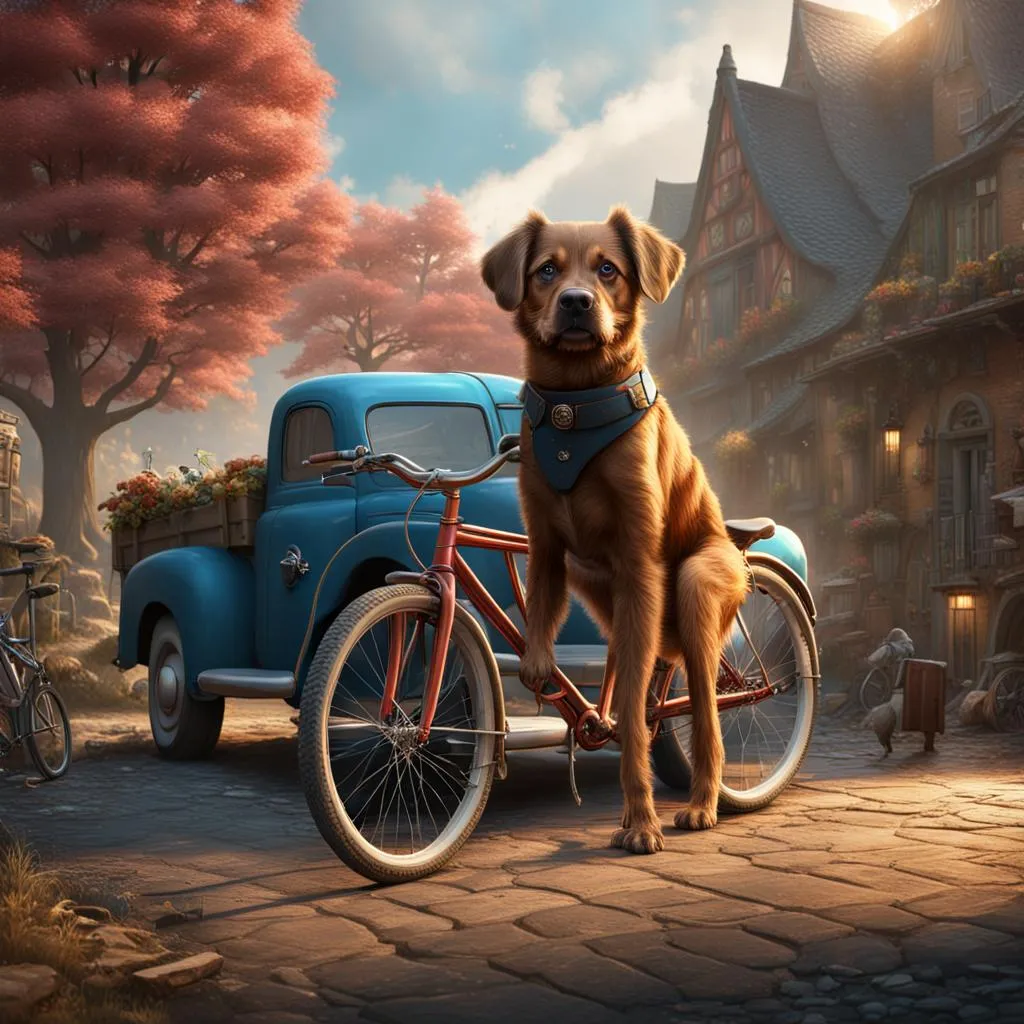

In [7]:
from PIL import Image
Image.open("/content/darknet/data/dog1.jpg")

## Step 8. 開始辨識

In [14]:
#!cd darknet; ./darknet detect darknet/cfg/yolov4.cfg yolov4.weights darknet/data/dog.jpg
! cd darknet; ./darknet detect /content/darknet/cfg/yolov4.cfg /content/yolov4.weights /content/darknet/data/dog1.jpg

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 

## Step 9. 查看辨識後的圖片

辨識後會生成一張 predictions.jpg，一樣運用 PIL 打開圖片





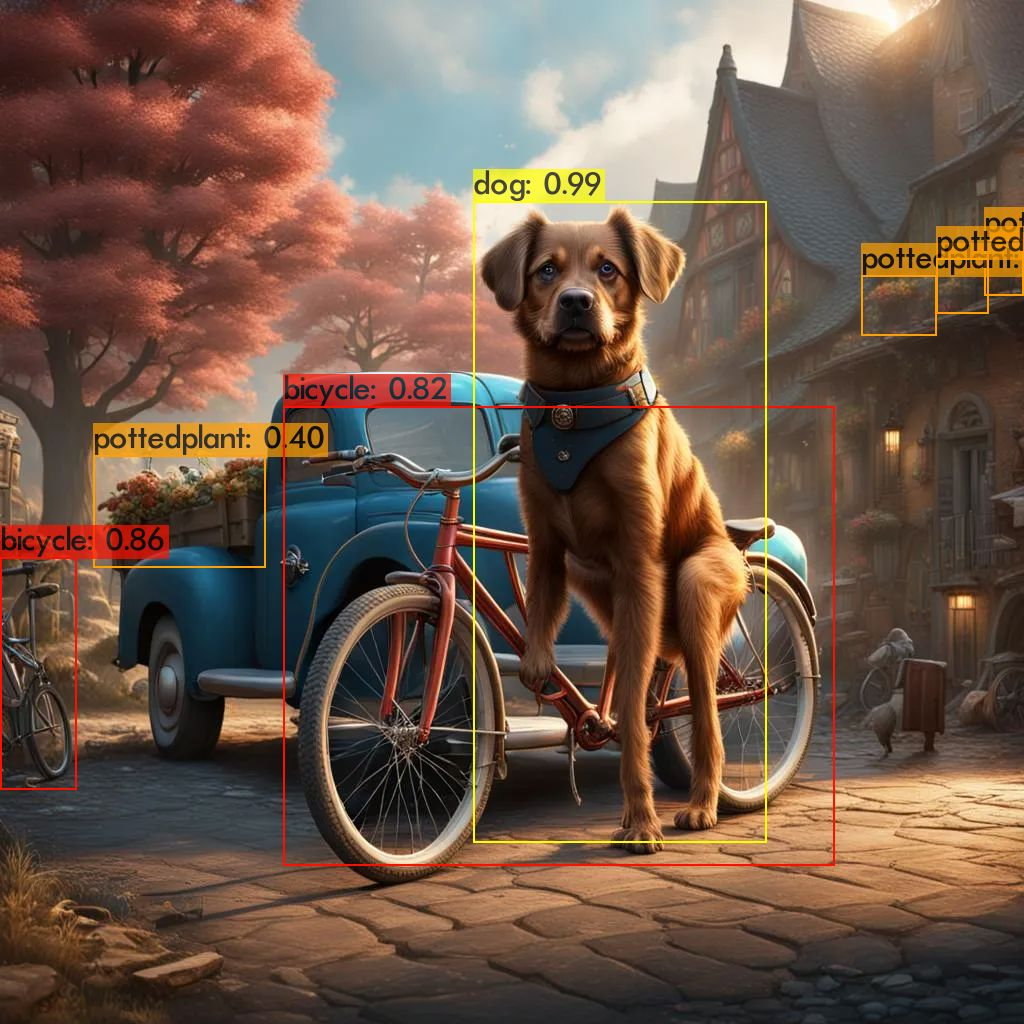

In [15]:
from PIL import Image

Image.open("/content/darknet/predictions.jpg")